In [46]:
import os
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup
import nltk
import preprocessor as p

In [47]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [2]:
filepath_test = os.path.join(os.getcwd(),os.listdir()[0])
filepath_training = os.path.join(os.getcwd(),os.listdir()[1])

In [3]:
test_data = pd.read_csv(filepath_test, header = None)
train_data = pd.read_csv(filepath_training, header = None, encoding = 'ISO-8859-1')

In [4]:
train_data

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [5]:
count = Counter()
count.update(train_data[0])

In [6]:
keys = list(count.keys())
values = [count[i] for i in keys]

Text(0.5, 1.0, 'Target Distribution')

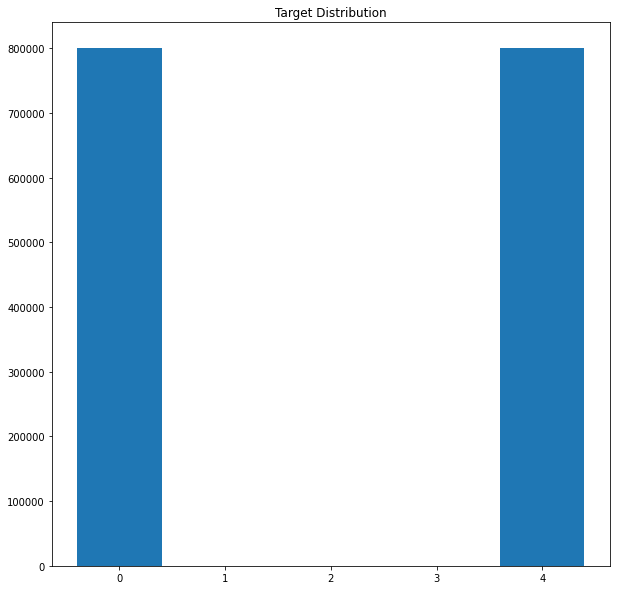

In [7]:
fig,ax = plt.subplots(1,1,figsize = (10,10))
ax.bar(keys,values)
ax.set_title('Target Distribution')

<h3>Drop Tweet ID and Flag</h3>

- Flag has only one value for everything hence it will be dropped
- Tweet ID has nothing that adds more

In [8]:
#Drop off Tweet ID and Flag
train_data.drop([1,3],axis = 1,inplace=True)

In [9]:
train_data

,0,2,4,5
0,0,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
2,0,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
4,0,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...
1599995,4,Tue Jun 16 08:40:49 PDT 2009,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,Tue Jun 16 08:40:49 PDT 2009,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Tue Jun 16 08:40:49 PDT 2009,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Tue Jun 16 08:40:49 PDT 2009,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [10]:
columns = ['Target','Time/date','User','Tweet']
train_data.columns = columns
train_data

,Target,Time/date,User,Tweet
0,0,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
2,0,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
4,0,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...
1599995,4,Tue Jun 16 08:40:49 PDT 2009,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,Tue Jun 16 08:40:49 PDT 2009,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Tue Jun 16 08:40:49 PDT 2009,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Tue Jun 16 08:40:49 PDT 2009,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


Above dataset was processed using SparkSQL

In [24]:
filepath_training = os.path.join(os.getcwd(),os.listdir()[3])
train_data = pd.read_csv(filepath_training, error_bad_lines= False)
train_data

C:\Users\ASUS\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3437: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 1436: expected 6 fields, saw 7\nSkipping line 10062: expected 6 fields, saw 7\nSkipping line 13380: expected 6 fields, saw 7\nSkipping line 26834: expected 6 fields, saw 8\nSkipping line 36283: expected 6 fields, saw 7\nSkipping line 38724: expected 6 fields, saw 7\nSkipping line 38910: expected 6 fields, saw 8\nSkipping line 40468: expected 6 fields, saw 9\nSkipping line 49050: expected 6 fields, saw 7\nSkipping line 52344: expected 6 fields, saw 7\nSkipping line 65617: expected 6 fields, saw 7\nSkipping line 71359: expected 6 fields, saw 7\nSkipping line 82808: expected 6 fields, saw 7\nSkipping line 82999: expected 6 fields, saw 14\nSkipping line 83775: expected 6 fields, saw 7\nSkipping line 87324: expected 6 fie

,Target,UserID,Tweet,Date,Time,Tweet Length
0,0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",06 Apr 2009,22:19:45,115
1,0,scotthamilton,is upset that he can't update his Facebook by ...,06 Apr 2009,22:19:49,111
2,0,mattycus,@Kenichan I dived many times for the ball. Man...,06 Apr 2009,22:19:53,89
3,0,ElleCTF,my whole body feels itchy and like its on fire,06 Apr 2009,22:19:57,47
4,0,Karoli,"@nationwideclass no, it's not behaving at all....",06 Apr 2009,22:19:57,111
...,...,...,...,...,...,...
1598546,4,AmandaMarie1028,Just woke up. Having no school is the best fee...,16 Jun 2009,08:40:49,56
1598547,4,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,16 Jun 2009,08:40:49,76
1598548,4,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,16 Jun 2009,08:40:49,57
1598549,4,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,16 Jun 2009,08:40:49,65


In [25]:
train_data.shape

(1598551, 6)

Boxplot of Tweet Length

C:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tweet Length'>

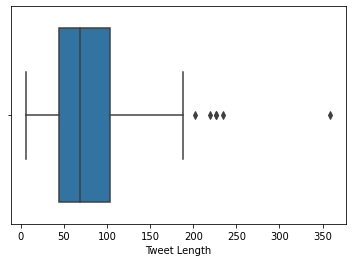

In [26]:
sns.boxplot(train_data["Tweet Length"])

In [43]:
train_data.loc[train_data["Tweet Length"] > 200]

,Target,UserID,Tweet,Date,Time,Tweet Length
1171970,4,kraqur,"I know pi to 12 digits. &quot;c&quot;,&quot;h...",31 May 2009,07:30:02,220
1179833,4,juanbarnard,"@LyNn_4 &quot;Human,&quot; &quot;Rehab,&quot; ...",31 May 2009,10:21:27,226
1446358,4,karendee,Thriving Ivory's song &quot;Twilight&quot; &gt...,06 Jun 2009,23:51:26,235
1496261,4,BanjoPickr,"BROOKE - &quot;frustrated&quot;, &quot;pissy&q...",07 Jun 2009,17:40:22,227
1530878,4,odd_one_in,"@curiousillusion Shoes, VERY important. And re...",15 Jun 2009,07:23:47,202
1581496,4,Dutchrudder,5 days till new top gear �?��?��?��?��?��?��?...,16 Jun 2009,02:32:51,359


In [45]:
soup = BeautifulSoup(train_data.iloc[1581496,2],'html.parser')
print(soup.get_text())

5 days till new top gear  �?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?��?�


In [49]:
p.set_options(p.OPT.URL,p.OPT.MENTION,p.OPT.EMOJI,p.OPT.SMILEY)
re.sub(r'[^\w\s\d]','',p.clean(train_data.iloc[0,2]))

' Awww thats a bummer You shoulda got David Carr of Third Day to do it'

In [54]:
re.sub(r'[^\w\s]','',"Hi'ndjdn /$sj")

'Hindjdn sj'

In [67]:
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords

stop = stopwords.words('english')

tok = TweetTokenizer()
tok.tokenize(re.sub(r'[^\w\s]','',p.clean(train_data.iloc[0,2])))

['Awww',
 'thats',
 'a',
 'bummer',
 'You',
 'shoulda',
 'got',
 'David',
 'Carr',
 'of',
 'Third',
 'Day',
 'to',
 'do',
 'it']

In [66]:
tok.tokenize(re.sub(r'[^\w\s]','',p.clean(train_data.iloc[1598549,2])))

['Happy',
 '38th',
 'Birthday',
 'to',
 'my',
 'boo',
 'of',
 'alll',
 'time',
 'Tupac',
 'Amaru',
 'Shakur']

In [70]:
re.sub(r'[\d]','',re.sub(r'[^\w\s]','','Hi 343213 gs234fdv44gbj &I@BDUB@&(('))

'Hi  gsfdvgbj IBDUB'

In [1]:
import re

In [9]:
re.sub(r'@[A-Za-z0-9]+',"",'@AAD## fff')

'## fff'

In [20]:
re.sub(r'https?:\/\/[^\s]+','','https://fceb.com')

''

In [24]:
from nltk.tokenize import word_tokenize
sent_list = ['Hi How are you?','What are you doing']
string = ""
word_list = [[word for word in word_tokenize(sent)] for sent in sent_list]
for lst in word_list:
    for word in lst:
        string = string + word + " "

In [25]:
string

'Hi How are you ? What are you doing '